In [1]:
#Basic packages always been used
import pandas as pd
import numpy as np
import sktime
import matplotlib.pyplot as plt
from datetime import datetime
# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split
# ALgorithm
from sklearn import tree
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
# Functions for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error

In [2]:
data = pd.read_csv("nasdaq.csv")

In [3]:
x=data.drop(['Date','Close'],axis=1).copy()
y=data['Close'].copy()

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### SVR_RBF Holdout + Cross Validation Expending Window

In [5]:
x_train1 = np.array(x[0:62])
y_train1 = np.array(y[0:62])
x_validation1 = np.array(x[62:124])
y_validation1 = np.array(y[62:124])

x_train2 = np.array(x[0:124])
y_train2 = np.array(y[0:124])
x_validation2 = np.array(x[124:186])
y_validation2 = np.array(y[124:186])

x_train3 = np.array(x[0:186])
y_train3 = np.array(y[0:186])
x_validation3 = np.array(x[186:250])
y_validation3 = np.array(y[186:250])

In [6]:
a = [2e-10,2e-6,2**8]
b = [2e-15,2e-10,2e-1]

mse_1_1 = 0
mse_1_2 = 0
mse_1_3 = 0
mse_2_1 = 0
mse_2_2 = 0
mse_2_3 = 0
mse_3_1 = 0
mse_3_2 = 0
mse_3_3 = 0

for i in a:
    for j in b:
        model=SVR(kernel='rbf', C=i, epsilon=j)
        model.fit(x_train1,y_train1)
            
        train_pred=model.predict(x_validation1)
        mse=mean_squared_error(y_validation1,train_pred,squared=True)
            
        if i==2e-10 and j==2e-15:
            mse_1_1 += mse
        if i==2e-10 and j==2e-10:
            mse_1_2 += mse
        if i==2e-10 and j==2e-1:
            mse_1_3 += mse
        if i==2e-6 and j==2e-15:
            mse_2_1 += mse
        if i==2e-6 and j==2e-10:
            mse_2_2 += mse
        if i==2e-6 and j==2e-1:
            mse_2_3 += mse
        if i==2**8 and j==2e-15:
            mse_3_1 += mse
        if i==2**8 and j==2e-10:
            mse_3_2 += mse
        if i==2**8 and j==2e-1:
            mse_3_3 += mse
                
print('MSE:')
print('mse_2_5:',round((mse_1_1),2))
print('mse_2_20:',round((mse_1_2),2))
print('mse_2_100:',round((mse_1_3),2))
print('mse_6_5:',round((mse_2_1),2))
print('mse_6_20:',round((mse_2_2),2))
print('mse_6_100:',round((mse_2_3),2))
print('mse_8_5:',round((mse_3_1),2))
print('mse_8_20:',round((mse_3_2),2))
print('mse_8_100:',round((mse_3_3),2))

MSE:
mse_2_5: 4489132.0
mse_2_20: 4489132.0
mse_2_100: 4489132.0
mse_6_5: 4489131.82
mse_6_20: 4489131.82
mse_6_100: 4489131.82
mse_8_5: 2654618.52
mse_8_20: 2654618.39
mse_8_100: 2654667.84


In [7]:
a = [2e-10,2e-6,2**8]
b = [2e-15,2e-10,2e-1]

mse_1_1 = 0
mse_1_2 = 0
mse_1_3 = 0
mse_2_1 = 0
mse_2_2 = 0
mse_2_3 = 0
mse_3_1 = 0
mse_3_2 = 0
mse_3_3 = 0

for i in a:
    for j in b:
        model=SVR(kernel='rbf', C=i, epsilon=j)
        model.fit(x_train2,y_train2)
            
        train_pred=model.predict(x_validation2)
        mse=mean_squared_error(y_validation2,train_pred,squared=True)
            
        if i==2e-10 and j==2e-15:
            mse_1_1 += mse
        if i==2e-10 and j==2e-10:
            mse_1_2 += mse
        if i==2e-10 and j==2e-1:
            mse_1_3 += mse
        if i==2e-6 and j==2e-15:
            mse_2_1 += mse
        if i==2e-6 and j==2e-10:
            mse_2_2 += mse
        if i==2e-6 and j==2e-1:
            mse_2_3 += mse
        if i==2**8 and j==2e-15:
            mse_3_1 += mse
        if i==2**8 and j==2e-10:
            mse_3_2 += mse
        if i==2**8 and j==2e-1:
            mse_3_3 += mse
                
print('MSE:')
print('mse_2_5:',round((mse_1_1),2))
print('mse_2_20:',round((mse_1_2),2))
print('mse_2_100:',round((mse_1_3),2))
print('mse_6_5:',round((mse_2_1),2))
print('mse_6_20:',round((mse_2_2),2))
print('mse_6_100:',round((mse_2_3),2))
print('mse_8_5:',round((mse_3_1),2))
print('mse_8_20:',round((mse_3_2),2))
print('mse_8_100:',round((mse_3_3),2))

MSE:
mse_2_5: 4115664.33
mse_2_20: 4115664.33
mse_2_100: 4115664.33
mse_6_5: 4115664.11
mse_6_20: 4115664.11
mse_6_100: 4115664.11
mse_8_5: 250151.49
mse_8_20: 250151.5
mse_8_100: 250231.42


In [8]:
a = [2e-10,2e-6,2**8]
b = [2e-15,2e-10,2e-1]

mse_1_1 = 0
mse_1_2 = 0
mse_1_3 = 0
mse_2_1 = 0
mse_2_2 = 0
mse_2_3 = 0
mse_3_1 = 0
mse_3_2 = 0
mse_3_3 = 0

for i in a:
    for j in b:
        model=SVR(kernel='rbf', C=i, epsilon=j)
        model.fit(x_train3,y_train3)
            
        train_pred=model.predict(x_validation3)
        mse=mean_squared_error(y_validation3,train_pred,squared=True)
            
        if i==2e-10 and j==2e-15:
            mse_1_1 += mse
        if i==2e-10 and j==2e-10:
            mse_1_2 += mse
        if i==2e-10 and j==2e-1:
            mse_1_3 += mse
        if i==2e-6 and j==2e-15:
            mse_2_1 += mse
        if i==2e-6 and j==2e-10:
            mse_2_2 += mse
        if i==2e-6 and j==2e-1:
            mse_2_3 += mse
        if i==2**8 and j==2e-15:
            mse_3_1 += mse
        if i==2**8 and j==2e-10:
            mse_3_2 += mse
        if i==2**8 and j==2e-1:
            mse_3_3 += mse
                
print('MSE:')
print('mse_2_5:',round((mse_1_1),2))
print('mse_2_20:',round((mse_1_2),2))
print('mse_2_100:',round((mse_1_3),2))
print('mse_6_5:',round((mse_2_1),2))
print('mse_6_20:',round((mse_2_2),2))
print('mse_6_100:',round((mse_2_3),2))
print('mse_8_5:',round((mse_3_1),2))
print('mse_8_20:',round((mse_3_2),2))
print('mse_8_100:',round((mse_3_3),2))

MSE:
mse_2_5: 4308210.99
mse_2_20: 4308210.99
mse_2_100: 4308210.99
mse_6_5: 4308210.68
mse_6_20: 4308210.68
mse_6_100: 4308210.68
mse_8_5: 294160.03
mse_8_20: 294159.45
mse_8_100: 294896.72


In [9]:
mse_2_5 = [4489132.0, 4115664.33, 4308210.99]
mse_2_20 = [4489132.0, 4115664.33, 4308210.99]
mse_2_100 = [4489132.0, 4115664.33, 4308210.99]
mse_6_5 = [4489131.82, 4115664.11, 4308210.68]
mse_6_20 = [4489131.82, 4115664.11, 4308210.68]
mse_6_100 = [4489131.82, 4115664.11, 4308210.68]
mse_8_5 = [2654618.52, 250151.49, 294160.03]
mse_8_20 = [2654618.39, 250151.5, 294159.45]
mse_8_100 = [2654667.84, 250231.42, 294896.72]

print('mse_2_5:',round(np.mean(mse_2_5),2),'+/-',round(np.std(mse_2_5),2))
print('mse_2_20:',round(np.mean(mse_2_20),2),'+/-',round(np.std(mse_2_20),2))
print('mse_2_100:',round(np.mean(mse_2_100),2),'+/-',round(np.std(mse_2_100),2))
print('mse_6_5:',round(np.mean(mse_6_5),2),'+/-',round(np.std(mse_6_5),2))
print('mse_6_20:',round(np.mean(mse_6_20),2),'+/-',round(np.std(mse_6_20),2))
print('mse_6_100:',round(np.mean(mse_6_100),2),'+/-',round(np.std(mse_6_100),2))
print('mse_8_5:',round(np.mean(mse_8_5),2),'+/-',round(np.std(mse_8_5),2))
print('mse_8_20:',round(np.mean(mse_8_20),2),'+/-',round(np.std(mse_8_20),2))
print('mse_8_100:',round(np.mean(mse_8_100),2),'+/-',round(np.std(mse_8_100),2))

mse_2_5: 4304335.77 +/- 152492.16
mse_2_20: 4304335.77 +/- 152492.16
mse_2_100: 4304335.77 +/- 152492.16
mse_6_5: 4304335.54 +/- 152492.18
mse_6_20: 4304335.54 +/- 152492.18
mse_6_100: 4304335.54 +/- 152492.18
mse_8_5: 1066310.01 +/- 1123247.41
mse_8_20: 1066309.78 +/- 1123247.48
mse_8_100: 1066598.66 +/- 1123082.53


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, shuffle=False)
model=SVR(kernel='rbf', C=2**8, epsilon=2e-10)
model.fit(x_train,y_train)

train_pred = model.predict(x_train)
train_mse = mean_squared_error(y_train,train_pred,squared=True)
train_rmse = mean_squared_error(y_train,train_pred, squared=False)
train_mape = mean_absolute_percentage_error(y_train,train_pred)
train_smape = 2*np.mean(np.abs(train_pred-y_train)/(np.abs(train_pred)+np.abs(y_train)))*100
train_mase = mean_absolute_scaled_error(y_train, train_pred, y_train=y_train)
train_mdrae = np.median(np.abs(y_train-train_pred)/(np.abs(y_train-x_train['Close-1'])))

test_pred = model.predict(x_test)
test_mse = mean_squared_error(y_test,test_pred,squared=True)
test_rmse = mean_squared_error(y_test,test_pred, squared=False)
test_mape = mean_absolute_percentage_error(y_test,test_pred)
test_smape = 2*np.mean(np.abs(test_pred-y_test)/(np.abs(test_pred)+np.abs(y_test)))*100
test_mase = mean_absolute_scaled_error(y_test, test_pred, y_train=y_test)
test_mdrae = np.median(np.abs(y_test-test_pred)/(np.abs(y_test-x_test['Close-1'])))

print('train_mse : ', np.round(train_mse,4))
print('train_rmse: ', np.round(train_rmse,4))
print('train_mape: ', np.round(train_mape,4))
print('train_smape: ', np.round(train_smape,4))
print('train_mase: ', np.round(train_mase,4))
print('train_mdrae: ', np.round(train_mdrae,4))
print('')
print('test_mse : ', np.round(test_mse,4))
print('test_rmse: ', np.round(test_rmse,4))
print('test_mape: ', np.round(test_mape,4))
print('test_smape: ', np.round(test_smape,4))
print('test_mase: ', np.round(test_mase,4))
print('test_mdrae: ', np.round(test_mdrae,4))

train_mse :  77737.6059
train_rmse:  278.8146
train_mape:  0.0173
train_smape:  1.7316
train_mase:  1.0784
train_mdrae:  1.0235

test_mse :  366651.2437
test_rmse:  605.5173
test_mape:  0.046
test_smape:  4.4475
test_mase:  2.8089
test_mdrae:  2.4469


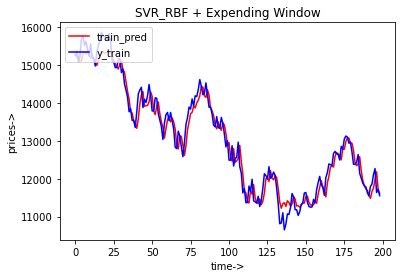

In [11]:
plt.plot(train_pred, color='red', label='train_pred')
plt.plot(y_train, color='blue', label='y_train')
plt.xlabel('time->')
plt.ylabel('prices->')
plt.title('SVR_RBF + Expending Window')
plt.legend(loc='upper left')
plt.show()

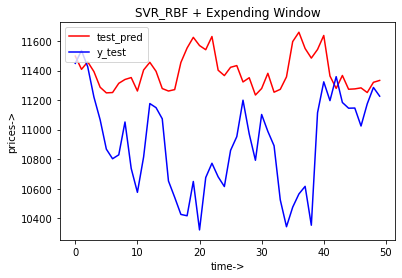

In [12]:
y_test = y_test.reset_index(drop=True)
plt.plot(test_pred, color='red', label='test_pred')
plt.plot(y_test, color='blue', label='y_test')
plt.xlabel('time->')
plt.ylabel('prices->')
plt.title('SVR_RBF + Expending Window')
plt.legend(loc='upper left')
plt.show()

### SVR_RBF Holdout + Cross Validation Rolling Window

In [5]:
x_train1 = np.array(x[0:62])
y_train1 = np.array(y[0:62])
x_validation1 = np.array(x[62:124])
y_validation1 = np.array(y[62:124])

x_train2 = np.array(x[62:124])
y_train2 = np.array(y[62:124])
x_validation2 = np.array(x[124:186])
y_validation2 = np.array(y[124:186])

x_train3 = np.array(x[124:186])
y_train3 = np.array(y[124:186])
x_validation3 = np.array(x[186:250])
y_validation3 = np.array(y[186:250])

In [6]:
a = [2e-10,2e-6,2**8]
b = [2e-15,2e-10,2e-1]

mse_1_1 = 0
mse_1_2 = 0
mse_1_3 = 0
mse_2_1 = 0
mse_2_2 = 0
mse_2_3 = 0
mse_3_1 = 0
mse_3_2 = 0
mse_3_3 = 0

for i in a:
    for j in b:
        model=SVR(kernel='rbf', C=i, epsilon=j)
        model.fit(x_train1,y_train1)
            
        train_pred=model.predict(x_validation1)
        mse=mean_squared_error(y_validation1,train_pred,squared=True)
            
        if i==2e-10 and j==2e-15:
            mse_1_1 += mse
        if i==2e-10 and j==2e-10:
            mse_1_2 += mse
        if i==2e-10 and j==2e-1:
            mse_1_3 += mse
        if i==2e-6 and j==2e-15:
            mse_2_1 += mse
        if i==2e-6 and j==2e-10:
            mse_2_2 += mse
        if i==2e-6 and j==2e-1:
            mse_2_3 += mse
        if i==2**8 and j==2e-15:
            mse_3_1 += mse
        if i==2**8 and j==2e-10:
            mse_3_2 += mse
        if i==2**8 and j==2e-1:
            mse_3_3 += mse
                
print('MSE:')
print('mse_2_5:',round((mse_1_1),2))
print('mse_2_20:',round((mse_1_2),2))
print('mse_2_100:',round((mse_1_3),2))
print('mse_6_5:',round((mse_2_1),2))
print('mse_6_20:',round((mse_2_2),2))
print('mse_6_100:',round((mse_2_3),2))
print('mse_8_5:',round((mse_3_1),2))
print('mse_8_20:',round((mse_3_2),2))
print('mse_8_100:',round((mse_3_3),2))

MSE:
mse_2_5: 4489132.0
mse_2_20: 4489132.0
mse_2_100: 4489132.0
mse_6_5: 4489131.82
mse_6_20: 4489131.82
mse_6_100: 4489131.82
mse_8_5: 2654618.52
mse_8_20: 2654618.39
mse_8_100: 2654667.84


In [7]:
a = [2e-10,2e-6,2**8]
b = [2e-15,2e-10,2e-1]

mse_1_1 = 0
mse_1_2 = 0
mse_1_3 = 0
mse_2_1 = 0
mse_2_2 = 0
mse_2_3 = 0
mse_3_1 = 0
mse_3_2 = 0
mse_3_3 = 0

for i in a:
    for j in b:
        model=SVR(kernel='rbf', C=i, epsilon=j)
        model.fit(x_train2,y_train2)
            
        train_pred=model.predict(x_validation2)
        mse=mean_squared_error(y_validation2,train_pred,squared=True)
            
        if i==2e-10 and j==2e-15:
            mse_1_1 += mse
        if i==2e-10 and j==2e-10:
            mse_1_2 += mse
        if i==2e-10 and j==2e-1:
            mse_1_3 += mse
        if i==2e-6 and j==2e-15:
            mse_2_1 += mse
        if i==2e-6 and j==2e-10:
            mse_2_2 += mse
        if i==2e-6 and j==2e-1:
            mse_2_3 += mse
        if i==2**8 and j==2e-15:
            mse_3_1 += mse
        if i==2**8 and j==2e-10:
            mse_3_2 += mse
        if i==2**8 and j==2e-1:
            mse_3_3 += mse
                
print('MSE:')
print('mse_2_5:',round((mse_1_1),2))
print('mse_2_20:',round((mse_1_2),2))
print('mse_2_100:',round((mse_1_3),2))
print('mse_6_5:',round((mse_2_1),2))
print('mse_6_20:',round((mse_2_2),2))
print('mse_6_100:',round((mse_2_3),2))
print('mse_8_5:',round((mse_3_1),2))
print('mse_8_20:',round((mse_3_2),2))
print('mse_8_100:',round((mse_3_3),2))

MSE:
mse_2_5: 1810338.98
mse_2_20: 1810338.98
mse_2_100: 1810338.98
mse_6_5: 1810338.91
mse_6_20: 1810338.91
mse_6_100: 1810338.91
mse_8_5: 225470.41
mse_8_20: 225470.31
mse_8_100: 225538.19


In [8]:
a = [2e-10,2e-6,2**8]
b = [2e-15,2e-10,2e-1]

mse_1_1 = 0
mse_1_2 = 0
mse_1_3 = 0
mse_2_1 = 0
mse_2_2 = 0
mse_2_3 = 0
mse_3_1 = 0
mse_3_2 = 0
mse_3_3 = 0

for i in a:
    for j in b:
        model=SVR(kernel='rbf', C=i, epsilon=j)
        model.fit(x_train3,y_train3)
            
        train_pred=model.predict(x_validation3)
        mse=mean_squared_error(y_validation3,train_pred,squared=True)
            
        if i==2e-10 and j==2e-15:
            mse_1_1 += mse
        if i==2e-10 and j==2e-10:
            mse_1_2 += mse
        if i==2e-10 and j==2e-1:
            mse_1_3 += mse
        if i==2e-6 and j==2e-15:
            mse_2_1 += mse
        if i==2e-6 and j==2e-10:
            mse_2_2 += mse
        if i==2e-6 and j==2e-1:
            mse_2_3 += mse
        if i==2**8 and j==2e-15:
            mse_3_1 += mse
        if i==2**8 and j==2e-10:
            mse_3_2 += mse
        if i==2**8 and j==2e-1:
            mse_3_3 += mse
                
print('MSE:')
print('mse_2_5:',round((mse_1_1),2))
print('mse_2_20:',round((mse_1_2),2))
print('mse_2_100:',round((mse_1_3),2))
print('mse_6_5:',round((mse_2_1),2))
print('mse_6_20:',round((mse_2_2),2))
print('mse_6_100:',round((mse_2_3),2))
print('mse_8_5:',round((mse_3_1),2))
print('mse_8_20:',round((mse_3_2),2))
print('mse_8_100:',round((mse_3_3),2))

MSE:
mse_2_5: 949720.12
mse_2_20: 949720.12
mse_2_100: 949720.12
mse_6_5: 949720.08
mse_6_20: 949720.08
mse_6_100: 949720.08
mse_8_5: 152382.87
mse_8_20: 152382.79
mse_8_100: 152466.61


In [17]:
mse_2_5 = [4489132.0, 1810338.98, 949720.12]
mse_2_20 = [4489132.0, 1810338.98, 949720.12]
mse_2_100 = [4489132.0, 1810338.98, 949720.12]
mse_6_5 = [4489131.82, 1810338.91, 949720.08]
mse_6_20 = [4489131.82, 1810338.91, 949720.08]
mse_6_100 = [4489131.82, 1810338.91, 949720.08]
mse_8_5 = [2654618.52, 225470.41, 152382.87]
mse_8_20 = [2654618.39, 225470.31, 152382.79]
mse_8_100 = [2654667.84, 225538.19, 152466.61]

print('mse_2_5:',round(np.mean(mse_2_5),2),'+/-',round(np.std(mse_2_5),2))
print('mse_2_20:',round(np.mean(mse_2_20),2),'+/-',round(np.std(mse_2_20),2))
print('mse_2_100:',round(np.mean(mse_2_100),2),'+/-',round(np.std(mse_2_100),2))
print('mse_6_5:',round(np.mean(mse_6_5),2),'+/-',round(np.std(mse_6_5),2))
print('mse_6_20:',round(np.mean(mse_6_20),2),'+/-',round(np.std(mse_6_20),2))
print('mse_6_100:',round(np.mean(mse_6_100),2),'+/-',round(np.std(mse_6_100),2))
print('mse_8_5:',round(np.mean(mse_8_5),2),'+/-',round(np.std(mse_8_5),2))
print('mse_8_20:',round(np.mean(mse_8_20),2),'+/-',round(np.std(mse_8_20),2))
print('mse_8_100:',round(np.mean(mse_8_100),2),'+/-',round(np.std(mse_8_100),2))

mse_2_5: 2416397.03 +/- 1507169.29
mse_2_20: 2416397.03 +/- 1507169.29
mse_2_100: 2416397.03 +/- 1507169.29
mse_6_5: 2416396.94 +/- 1507169.23
mse_6_20: 2416396.94 +/- 1507169.23
mse_6_100: 2416396.94 +/- 1507169.23
mse_8_5: 1010823.93 +/- 1162721.21
mse_8_20: 1010823.83 +/- 1162721.19
mse_8_100: 1010890.88 +/- 1162708.59


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, shuffle=False)
model=SVR(kernel='rbf', C=2**8, epsilon=2e-10)
model.fit(x_train,y_train)

train_pred = model.predict(x_train)
train_mse = mean_squared_error(y_train,train_pred,squared=True)
train_rmse = mean_squared_error(y_train,train_pred, squared=False)
train_mape = mean_absolute_percentage_error(y_train,train_pred)
train_smape = 2*np.mean(np.abs(train_pred-y_train)/(np.abs(train_pred)+np.abs(y_train)))*100
train_mase = mean_absolute_scaled_error(y_train, train_pred, y_train=y_train)
train_mdrae = np.median(np.abs(y_train-train_pred)/(np.abs(y_train-x_train['Close-1'])))

test_pred = model.predict(x_test)
test_mse = mean_squared_error(y_test,test_pred,squared=True)
test_rmse = mean_squared_error(y_test,test_pred, squared=False)
test_mape = mean_absolute_percentage_error(y_test,test_pred)
test_smape = 2*np.mean(np.abs(test_pred-y_test)/(np.abs(test_pred)+np.abs(y_test)))*100
test_mase = mean_absolute_scaled_error(y_test, test_pred, y_train=y_test)
test_mdrae = np.median(np.abs(y_test-test_pred)/(np.abs(y_test-x_test['Close-1'])))

print('train_mse : ', np.round(train_mse,4))
print('train_rmse: ', np.round(train_rmse,4))
print('train_mape: ', np.round(train_mape,4))
print('train_smape: ', np.round(train_smape,4))
print('train_mase: ', np.round(train_mase,4))
print('train_mdrae: ', np.round(train_mdrae,4))
print('')
print('test_mse : ', np.round(test_mse,4))
print('test_rmse: ', np.round(test_rmse,4))
print('test_mape: ', np.round(test_mape,4))
print('test_smape: ', np.round(test_smape,4))
print('test_mase: ', np.round(test_mase,4))
print('test_mdrae: ', np.round(test_mdrae,4))

train_mse :  77737.6059
train_rmse:  278.8146
train_mape:  0.0173
train_smape:  1.7316
train_mase:  1.0784
train_mdrae:  1.0235

test_mse :  366651.2437
test_rmse:  605.5173
test_mape:  0.046
test_smape:  4.4475
test_mase:  2.8089
test_mdrae:  2.4469


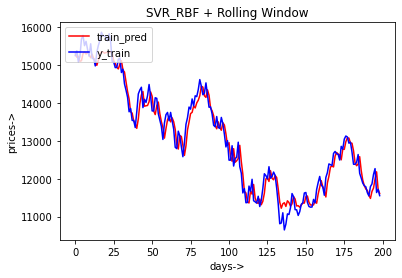

In [19]:
plt.plot(train_pred, color='red', label='train_pred')
plt.plot(y_train, color='blue', label='y_train')
plt.xlabel('days->')
plt.ylabel('prices->')
plt.title('SVR_RBF + Rolling Window')
plt.legend(loc='upper left')
plt.show()

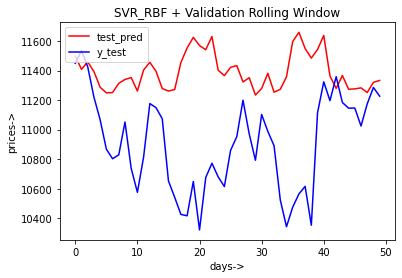

In [20]:
y_test = y_test.reset_index(drop=True)
plt.plot(test_pred, color='red', label='test_pred')
plt.plot(y_test, color='blue', label='y_test')
plt.xlabel('days->')
plt.ylabel('prices->')
plt.title('SVR_RBF + Validation Rolling Window')
plt.legend(loc='upper left')
plt.show()

### SVR_POLY Holdout + Cross Validation Expending Window

In [21]:
x_train1 = np.array(x[0:62])
y_train1 = np.array(y[0:62])
x_validation1 = np.array(x[62:124])
y_validation1 = np.array(y[62:124])

x_train2 = np.array(x[0:124])
y_train2 = np.array(y[0:124])
x_validation2 = np.array(x[124:186])
y_validation2 = np.array(y[124:186])

x_train3 = np.array(x[0:186])
y_train3 = np.array(y[0:186])
x_validation3 = np.array(x[186:250])
y_validation3 = np.array(y[186:250])

In [22]:
a = [2e-10,2e-6,2**8]
b = [2e-15,2e-10,2e-1]

mse_1_1 = 0
mse_1_2 = 0
mse_1_3 = 0
mse_2_1 = 0
mse_2_2 = 0
mse_2_3 = 0
mse_3_1 = 0
mse_3_2 = 0
mse_3_3 = 0

for i in a:
    for j in b:
        model=SVR(kernel='poly', C=i, epsilon=j)
        model.fit(x_train1,y_train1)
            
        train_pred=model.predict(x_validation1)
        mse=mean_squared_error(y_validation1,train_pred,squared=True)
            
        if i==2e-10 and j==2e-15:
            mse_1_1 += mse
        if i==2e-10 and j==2e-10:
            mse_1_2 += mse
        if i==2e-10 and j==2e-1:
            mse_1_3 += mse
        if i==2e-6 and j==2e-15:
            mse_2_1 += mse
        if i==2e-6 and j==2e-10:
            mse_2_2 += mse
        if i==2e-6 and j==2e-1:
            mse_2_3 += mse
        if i==2**8 and j==2e-15:
            mse_3_1 += mse
        if i==2**8 and j==2e-10:
            mse_3_2 += mse
        if i==2**8 and j==2e-1:
            mse_3_3 += mse
                
print('MSE:')
print('mse_2_5:',round((mse_1_1),2))
print('mse_2_20:',round((mse_1_2),2))
print('mse_2_100:',round((mse_1_3),2))
print('mse_6_5:',round((mse_2_1),2))
print('mse_6_20:',round((mse_2_2),2))
print('mse_6_100:',round((mse_2_3),2))
print('mse_8_5:',round((mse_3_1),2))
print('mse_8_20:',round((mse_3_2),2))
print('mse_8_100:',round((mse_3_3),2))

MSE:
mse_2_5: 4489024.96
mse_2_20: 4489024.96
mse_2_100: 4489024.96
mse_6_5: 3484335.86
mse_6_20: 3484335.86
mse_6_100: 3484335.86
mse_8_5: 1280393.76
mse_8_20: 890692.39
mse_8_100: 654035.14


In [23]:
a = [2e-10,2e-6,2**8]
b = [2e-15,2e-10,2e-1]

mse_1_1 = 0
mse_1_2 = 0
mse_1_3 = 0
mse_2_1 = 0
mse_2_2 = 0
mse_2_3 = 0
mse_3_1 = 0
mse_3_2 = 0
mse_3_3 = 0

for i in a:
    for j in b:
        model=SVR(kernel='poly', C=i, epsilon=j)
        model.fit(x_train2,y_train2)
            
        train_pred=model.predict(x_validation2)
        mse=mean_squared_error(y_validation2,train_pred,squared=True)
            
        if i==2e-10 and j==2e-15:
            mse_1_1 += mse
        if i==2e-10 and j==2e-10:
            mse_1_2 += mse
        if i==2e-10 and j==2e-1:
            mse_1_3 += mse
        if i==2e-6 and j==2e-15:
            mse_2_1 += mse
        if i==2e-6 and j==2e-10:
            mse_2_2 += mse
        if i==2e-6 and j==2e-1:
            mse_2_3 += mse
        if i==2**8 and j==2e-15:
            mse_3_1 += mse
        if i==2**8 and j==2e-10:
            mse_3_2 += mse
        if i==2**8 and j==2e-1:
            mse_3_3 += mse
                
print('MSE:')
print('mse_2_5:',round((mse_1_1),2))
print('mse_2_20:',round((mse_1_2),2))
print('mse_2_100:',round((mse_1_3),2))
print('mse_6_5:',round((mse_2_1),2))
print('mse_6_20:',round((mse_2_2),2))
print('mse_6_100:',round((mse_2_3),2))
print('mse_8_5:',round((mse_3_1),2))
print('mse_8_20:',round((mse_3_2),2))
print('mse_8_100:',round((mse_3_3),2))

MSE:
mse_2_5: 4115647.06
mse_2_20: 4115647.06
mse_2_100: 4115647.06
mse_6_5: 3959614.75
mse_6_20: 3959614.75
mse_6_100: 3959614.75
mse_8_5: 100495.45
mse_8_20: 100495.46
mse_8_100: 88112.31


In [24]:
a = [2e-10,2e-6,2**8]
b = [2e-15,2e-10,2e-1]

mse_1_1 = 0
mse_1_2 = 0
mse_1_3 = 0
mse_2_1 = 0
mse_2_2 = 0
mse_2_3 = 0
mse_3_1 = 0
mse_3_2 = 0
mse_3_3 = 0

for i in a:
    for j in b:
        model=SVR(kernel='poly', C=i, epsilon=j)
        model.fit(x_train3,y_train3)
            
        train_pred=model.predict(x_validation3)
        mse=mean_squared_error(y_validation3,train_pred,squared=True)
            
        if i==2e-10 and j==2e-15:
            mse_1_1 += mse
        if i==2e-10 and j==2e-10:
            mse_1_2 += mse
        if i==2e-10 and j==2e-1:
            mse_1_3 += mse
        if i==2e-6 and j==2e-15:
            mse_2_1 += mse
        if i==2e-6 and j==2e-10:
            mse_2_2 += mse
        if i==2e-6 and j==2e-1:
            mse_2_3 += mse
        if i==2**8 and j==2e-15:
            mse_3_1 += mse
        if i==2**8 and j==2e-10:
            mse_3_2 += mse
        if i==2**8 and j==2e-1:
            mse_3_3 += mse
                
print('MSE:')
print('mse_2_5:',round((mse_1_1),2))
print('mse_2_20:',round((mse_1_2),2))
print('mse_2_100:',round((mse_1_3),2))
print('mse_6_5:',round((mse_2_1),2))
print('mse_6_20:',round((mse_2_2),2))
print('mse_6_100:',round((mse_2_3),2))
print('mse_8_5:',round((mse_3_1),2))
print('mse_8_20:',round((mse_3_2),2))
print('mse_8_100:',round((mse_3_3),2))

MSE:
mse_2_5: 4308201.15
mse_2_20: 4308201.15
mse_2_100: 4308201.15
mse_6_5: 4210361.1
mse_6_20: 4210361.1
mse_6_100: 4210361.1
mse_8_5: 123272.93
mse_8_20: 123272.96
mse_8_100: 123311.77


In [25]:
mse_2_5 = [4489024.96, 4115647.06, 4308201.15]
mse_2_20 = [4489024.96, 4115647.06, 4308201.15]
mse_2_100 = [4489024.96, 4115647.06, 4308201.15]
mse_6_5 = [3484335.86, 3959614.75, 4210361.1]
mse_6_20 = [3484335.86, 3959614.75, 4210361.1]
mse_6_100 = [3484335.86, 3959614.75, 4210361.1]
mse_8_5 = [1280393.76, 100495.45, 123272.93]
mse_8_20 = [890692.39, 100495.46, 123272.96]
mse_8_100 = [654035.14, 88112.31, 123311.77]

print('mse_2_5:',round(np.mean(mse_2_5),2),'+/-',round(np.std(mse_2_5),2))
print('mse_2_20:',round(np.mean(mse_2_20),2),'+/-',round(np.std(mse_2_20),2))
print('mse_2_100:',round(np.mean(mse_2_100),2),'+/-',round(np.std(mse_2_100),2))
print('mse_6_5:',round(np.mean(mse_6_5),2),'+/-',round(np.std(mse_6_5),2))
print('mse_6_20:',round(np.mean(mse_6_20),2),'+/-',round(np.std(mse_6_20),2))
print('mse_6_100:',round(np.mean(mse_6_100),2),'+/-',round(np.std(mse_6_100),2))
print('mse_8_5:',round(np.mean(mse_8_5),2),'+/-',round(np.std(mse_8_5),2))
print('mse_8_20:',round(np.mean(mse_8_20),2),'+/-',round(np.std(mse_8_20),2))
print('mse_8_100:',round(np.mean(mse_8_100),2),'+/-',round(np.std(mse_8_100),2))

mse_2_5: 4304291.06 +/- 152455.96
mse_2_20: 4304291.06 +/- 152455.96
mse_2_100: 4304291.06 +/- 152455.96
mse_6_5: 3884770.57 +/- 301086.26
mse_6_20: 3884770.57 +/- 301086.26
mse_6_100: 3884770.57 +/- 301086.26
mse_8_5: 501387.38 +/- 550919.18
mse_8_20: 371486.94 +/- 367251.44
mse_8_100: 288486.41 +/- 258881.13


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, shuffle=False)
model=SVR(kernel='poly', C=2**8, epsilon=2e-1)
model.fit(x_train,y_train)

train_pred = model.predict(x_train)
train_mse = mean_squared_error(y_train,train_pred,squared=True)
train_rmse = mean_squared_error(y_train,train_pred, squared=False)
train_mape = mean_absolute_percentage_error(y_train,train_pred)
train_smape = 2*np.mean(np.abs(train_pred-y_train)/(np.abs(train_pred)+np.abs(y_train)))*100
train_mase = mean_absolute_scaled_error(y_train, train_pred, y_train=y_train)
train_mdrae = np.median(np.abs(y_train-train_pred)/(np.abs(y_train-x_train['Close-1'])))

test_pred = model.predict(x_test)
test_mse = mean_squared_error(y_test,test_pred,squared=True)
test_rmse = mean_squared_error(y_test,test_pred, squared=False)
test_mape = mean_absolute_percentage_error(y_test,test_pred)
test_smape = 2*np.mean(np.abs(test_pred-y_test)/(np.abs(test_pred)+np.abs(y_test)))*100
test_mase = mean_absolute_scaled_error(y_test, test_pred, y_train=y_test)
test_mdrae = np.median(np.abs(y_test-test_pred)/(np.abs(y_test-x_test['Close-1'])))

print('train_mse : ', np.round(train_mse,4))
print('train_rmse: ', np.round(train_rmse,4))
print('train_mape: ', np.round(train_mape,4))
print('train_smape: ', np.round(train_smape,4))
print('train_mase: ', np.round(train_mase,4))
print('train_mdrae: ', np.round(train_mdrae,4))
print('')
print('test_mse : ', np.round(test_mse,4))
print('test_rmse: ', np.round(test_rmse,4))
print('test_mape: ', np.round(test_mape,4))
print('test_smape: ', np.round(test_smape,4))
print('test_mase: ', np.round(test_mase,4))
print('test_mdrae: ', np.round(test_mdrae,4))

train_mse :  80971.1076
train_rmse:  284.5542
train_mape:  0.0175
train_smape:  1.7488
train_mase:  1.0889
train_mdrae:  1.1571

test_mse :  118977.1261
test_rmse:  344.9306
test_mape:  0.0273
test_smape:  2.6809
test_mase:  1.675
test_mdrae:  2.0963


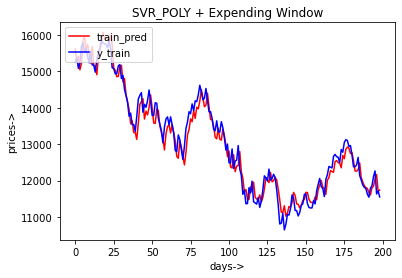

In [27]:
plt.plot(train_pred, color='red', label='train_pred')
plt.plot(y_train, color='blue', label='y_train')
plt.xlabel('days->')
plt.ylabel('prices->')
plt.title('SVR_POLY + Expending Window')
plt.legend(loc='upper left')
plt.show()

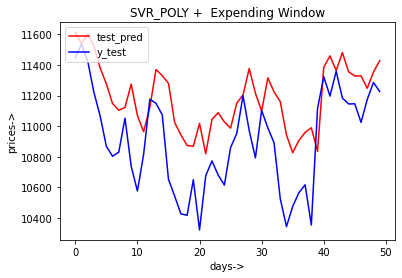

In [28]:
y_test = y_test.reset_index(drop=True)
plt.plot(test_pred, color='red', label='test_pred')
plt.plot(y_test, color='blue', label='y_test')
plt.xlabel('days->')
plt.ylabel('prices->')
plt.title('SVR_POLY +  Expending Window')
plt.legend(loc='upper left')
plt.show()

### SVR_POLY Holdout + Cross Validation Rolling Window

In [29]:
x_train1 = np.array(x[0:62])
y_train1 = np.array(y[0:62])
x_validation1 = np.array(x[62:124])
y_validation1 = np.array(y[62:124])

x_train2 = np.array(x[62:124])
y_train2 = np.array(y[62:124])
x_validation2 = np.array(x[124:186])
y_validation2 = np.array(y[124:186])

x_train3 = np.array(x[124:186])
y_train3 = np.array(y[124:186])
x_validation3 = np.array(x[186:250])
y_validation3 = np.array(y[186:250])

In [30]:
a = [2e-10,2e-6,2**8]
b = [2e-15,2e-10,2e-1]

mse_1_1 = 0
mse_1_2 = 0
mse_1_3 = 0
mse_2_1 = 0
mse_2_2 = 0
mse_2_3 = 0
mse_3_1 = 0
mse_3_2 = 0
mse_3_3 = 0

for i in a:
    for j in b:
        model=SVR(kernel='poly', C=i, epsilon=j)
        model.fit(x_train1,y_train1)
            
        train_pred=model.predict(x_validation1)
        mse=mean_squared_error(y_validation1,train_pred,squared=True)
            
        if i==2e-10 and j==2e-15:
            mse_1_1 += mse
        if i==2e-10 and j==2e-10:
            mse_1_2 += mse
        if i==2e-10 and j==2e-1:
            mse_1_3 += mse
        if i==2e-6 and j==2e-15:
            mse_2_1 += mse
        if i==2e-6 and j==2e-10:
            mse_2_2 += mse
        if i==2e-6 and j==2e-1:
            mse_2_3 += mse
        if i==2**8 and j==2e-15:
            mse_3_1 += mse
        if i==2**8 and j==2e-10:
            mse_3_2 += mse
        if i==2**8 and j==2e-1:
            mse_3_3 += mse
                
print('MSE:')
print('mse_2_5:',round((mse_1_1),2))
print('mse_2_20:',round((mse_1_2),2))
print('mse_2_100:',round((mse_1_3),2))
print('mse_6_5:',round((mse_2_1),2))
print('mse_6_20:',round((mse_2_2),2))
print('mse_6_100:',round((mse_2_3),2))
print('mse_8_5:',round((mse_3_1),2))
print('mse_8_20:',round((mse_3_2),2))
print('mse_8_100:',round((mse_3_3),2))

MSE:
mse_2_5: 4489024.96
mse_2_20: 4489024.96
mse_2_100: 4489024.96
mse_6_5: 3484335.86
mse_6_20: 3484335.86
mse_6_100: 3484335.86
mse_8_5: 1280393.76
mse_8_20: 890692.39
mse_8_100: 654035.14


In [31]:
a = [2e-10,2e-6,2**8]
b = [2e-15,2e-10,2e-1]

mse_1_1 = 0
mse_1_2 = 0
mse_1_3 = 0
mse_2_1 = 0
mse_2_2 = 0
mse_2_3 = 0
mse_3_1 = 0
mse_3_2 = 0
mse_3_3 = 0

for i in a:
    for j in b:
        model=SVR(kernel='poly', C=i, epsilon=j)
        model.fit(x_train2,y_train2)
            
        train_pred=model.predict(x_validation2)
        mse=mean_squared_error(y_validation2,train_pred,squared=True)
            
        if i==2e-10 and j==2e-15:
            mse_1_1 += mse
        if i==2e-10 and j==2e-10:
            mse_1_2 += mse
        if i==2e-10 and j==2e-1:
            mse_1_3 += mse
        if i==2e-6 and j==2e-15:
            mse_2_1 += mse
        if i==2e-6 and j==2e-10:
            mse_2_2 += mse
        if i==2e-6 and j==2e-1:
            mse_2_3 += mse
        if i==2**8 and j==2e-15:
            mse_3_1 += mse
        if i==2**8 and j==2e-10:
            mse_3_2 += mse
        if i==2**8 and j==2e-1:
            mse_3_3 += mse
                
print('MSE:')
print('mse_2_5:',round((mse_1_1),2))
print('mse_2_20:',round((mse_1_2),2))
print('mse_2_100:',round((mse_1_3),2))
print('mse_6_5:',round((mse_2_1),2))
print('mse_6_20:',round((mse_2_2),2))
print('mse_6_100:',round((mse_2_3),2))
print('mse_8_5:',round((mse_3_1),2))
print('mse_8_20:',round((mse_3_2),2))
print('mse_8_100:',round((mse_3_3),2))

MSE:
mse_2_5: 1810329.99
mse_2_20: 1810329.99
mse_2_100: 1810329.99
mse_6_5: 1721651.66
mse_6_20: 1721651.66
mse_6_100: 1721651.66
mse_8_5: 133613.28
mse_8_20: 68329.49
mse_8_100: 68334.91


In [32]:
a = [2e-10,2e-6,2**8]
b = [2e-15,2e-10,2e-1]

mse_1_1 = 0
mse_1_2 = 0
mse_1_3 = 0
mse_2_1 = 0
mse_2_2 = 0
mse_2_3 = 0
mse_3_1 = 0
mse_3_2 = 0
mse_3_3 = 0

for i in a:
    for j in b:
        model=SVR(kernel='poly', C=i, epsilon=j)
        model.fit(x_train3,y_train3)
            
        train_pred=model.predict(x_validation3)
        mse=mean_squared_error(y_validation3,train_pred,squared=True)
            
        if i==2e-10 and j==2e-15:
            mse_1_1 += mse
        if i==2e-10 and j==2e-10:
            mse_1_2 += mse
        if i==2e-10 and j==2e-1:
            mse_1_3 += mse
        if i==2e-6 and j==2e-15:
            mse_2_1 += mse
        if i==2e-6 and j==2e-10:
            mse_2_2 += mse
        if i==2e-6 and j==2e-1:
            mse_2_3 += mse
        if i==2**8 and j==2e-15:
            mse_3_1 += mse
        if i==2**8 and j==2e-10:
            mse_3_2 += mse
        if i==2**8 and j==2e-1:
            mse_3_3 += mse
                
print('MSE:')
print('mse_2_5:',round((mse_1_1),2))
print('mse_2_20:',round((mse_1_2),2))
print('mse_2_100:',round((mse_1_3),2))
print('mse_6_5:',round((mse_2_1),2))
print('mse_6_20:',round((mse_2_2),2))
print('mse_6_100:',round((mse_2_3),2))
print('mse_8_5:',round((mse_3_1),2))
print('mse_8_20:',round((mse_3_2),2))
print('mse_8_100:',round((mse_3_3),2))

MSE:
mse_2_5: 949699.46
mse_2_20: 949699.46
mse_2_100: 949699.46
mse_6_5: 755309.15
mse_6_20: 755309.15
mse_6_100: 755309.15
mse_8_5: 899893.05
mse_8_20: 1313776.37
mse_8_100: 369916.8


In [33]:
mse_2_5 = [4489024.96, 1810329.99, 949699.46]
mse_2_20 = [4489024.96, 1810329.99, 949699.46]
mse_2_100 = [4489024.96, 1810329.99, 949699.46]
mse_6_5 = [3484335.86, 1721651.66, 755309.15]
mse_6_20 = [3484335.86, 1721651.66, 755309.15]
mse_6_100 = [3484335.86, 1721651.66, 755309.15]
mse_8_5 = [1280393.76, 133613.28, 899893.05]
mse_8_20 = [890692.39, 68329.49, 1313776.37]
mse_8_100 = [654035.14, 68334.91, 369916.8]

print('mse_2_5:',round(np.mean(mse_2_5),2),'+/-',round(np.std(mse_2_5),2))
print('mse_2_20:',round(np.mean(mse_2_20),2),'+/-',round(np.std(mse_2_20),2))
print('mse_2_100:',round(np.mean(mse_2_100),2),'+/-',round(np.std(mse_2_100),2))
print('mse_6_5:',round(np.mean(mse_6_5),2),'+/-',round(np.std(mse_6_5),2))
print('mse_6_20:',round(np.mean(mse_6_20),2),'+/-',round(np.std(mse_6_20),2))
print('mse_6_100:',round(np.mean(mse_6_100),2),'+/-',round(np.std(mse_6_100),2))
print('mse_8_5:',round(np.mean(mse_8_5),2),'+/-',round(np.std(mse_8_5),2))
print('mse_8_20:',round(np.mean(mse_8_20),2),'+/-',round(np.std(mse_8_20),2))
print('mse_8_100:',round(np.mean(mse_8_100),2),'+/-',round(np.std(mse_8_100),2))

mse_2_5: 2416351.47 +/- 1507128.12
mse_2_20: 2416351.47 +/- 1507128.12
mse_2_100: 2416351.47 +/- 1507128.12
mse_6_5: 1987098.89 +/- 1129821.04
mse_6_20: 1987098.89 +/- 1129821.04
mse_6_100: 1987098.89 +/- 1129821.04
mse_8_5: 771300.03 +/- 476919.62
mse_8_20: 757599.42 +/- 517087.86
mse_8_100: 364095.62 +/- 239146.54


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, shuffle=False)
model=SVR(kernel='poly', C=2**8, epsilon=2e-1)
model.fit(x_train,y_train)

train_pred = model.predict(x_train)
train_mse = mean_squared_error(y_train,train_pred,squared=True)
train_rmse = mean_squared_error(y_train,train_pred, squared=False)
train_mape = mean_absolute_percentage_error(y_train,train_pred)
train_smape = 2*np.mean(np.abs(train_pred-y_train)/(np.abs(train_pred)+np.abs(y_train)))*100
train_mase = mean_absolute_scaled_error(y_train, train_pred, y_train=y_train)
train_mdrae = np.median(np.abs(y_train-train_pred)/(np.abs(y_train-x_train['Close-1'])))

test_pred = model.predict(x_test)
test_mse = mean_squared_error(y_test,test_pred,squared=True)
test_rmse = mean_squared_error(y_test,test_pred, squared=False)
test_mape = mean_absolute_percentage_error(y_test,test_pred)
test_smape = 2*np.mean(np.abs(test_pred-y_test)/(np.abs(test_pred)+np.abs(y_test)))*100
test_mase = mean_absolute_scaled_error(y_test, test_pred, y_train=y_test)
test_mdrae = np.median(np.abs(y_test-test_pred)/(np.abs(y_test-x_test['Close-1'])))

print('train_mse : ', np.round(train_mse,4))
print('train_rmse: ', np.round(train_rmse,4))
print('train_mape: ', np.round(train_mape,4))
print('train_smape: ', np.round(train_smape,4))
print('train_mase: ', np.round(train_mase,4))
print('train_mdrae: ', np.round(train_mdrae,4))
print('')
print('test_mse : ', np.round(test_mse,4))
print('test_rmse: ', np.round(test_rmse,4))
print('test_mape: ', np.round(test_mape,4))
print('test_smape: ', np.round(test_smape,4))
print('test_mase: ', np.round(test_mase,4))
print('test_mdrae: ', np.round(test_mdrae,4))

train_mse :  80971.1076
train_rmse:  284.5542
train_mape:  0.0175
train_smape:  1.7488
train_mase:  1.0889
train_mdrae:  1.1571

test_mse :  118977.1261
test_rmse:  344.9306
test_mape:  0.0273
test_smape:  2.6809
test_mase:  1.675
test_mdrae:  2.0963


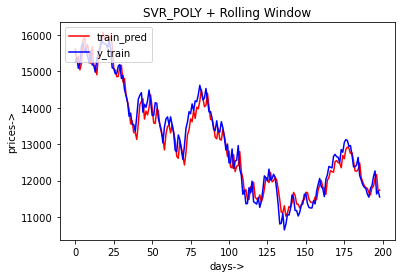

In [35]:
plt.plot(train_pred, color='red', label='train_pred')
plt.plot(y_train, color='blue', label='y_train')
plt.xlabel('days->')
plt.ylabel('prices->')
plt.title('SVR_POLY + Rolling Window')
plt.legend(loc='upper left')
plt.show()

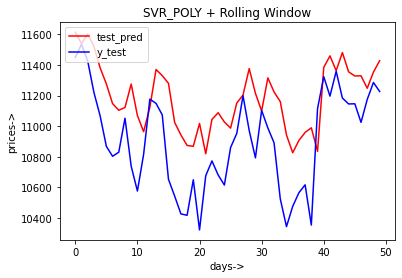

In [36]:
y_test = y_test.reset_index(drop=True)
plt.plot(test_pred, color='red', label='test_pred')
plt.plot(y_test, color='blue', label='y_test')
plt.xlabel('days->')
plt.ylabel('prices->')
plt.title('SVR_POLY + Rolling Window')
plt.legend(loc='upper left')
plt.show()